# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.shape

(16860, 12)

In [3]:
from collections import Counter
Counter(hospital_read_df['Number of Discharges'])

Counter({'242': 20,
         '247': 21,
         '586': 8,
         '965': 2,
         '149': 26,
         '141': 29,
         '390': 14,
         '178': 22,
         '98': 28,
         '256': 22,
         '121': 27,
         '108': 34,
         '780': 4,
         '216': 31,
         '1458': 1,
         '238': 21,
         '154': 19,
         '117': 33,
         '322': 12,
         '493': 10,
         '332': 20,
         '136': 27,
         '179': 23,
         '97': 33,
         '536': 10,
         '268': 28,
         '1658': 1,
         '260': 19,
         '57': 22,
         '118': 29,
         '76': 19,
         '354': 17,
         '464': 9,
         '169': 33,
         '281': 21,
         '462': 6,
         '331': 16,
         '676': 9,
         '326': 18,
         '956': 2,
         '87': 29,
         '921': 3,
         '133': 25,
         '231': 24,
         '170': 23,
         '210': 25,
         '212': 25,
         '265': 22,
         '731': 2,
         '156': 21,
         '291'

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.shape

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(11578, 12)

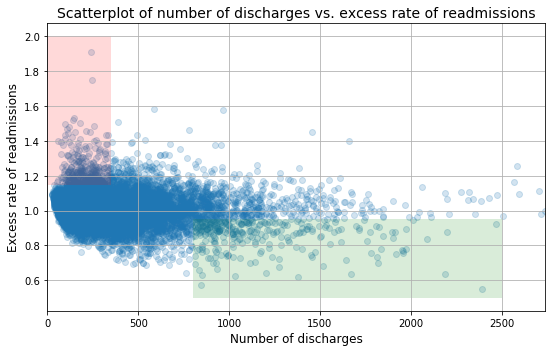

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [165]:
print('A:  I do not agree with the above analysis and recommendations. I will list my observations:')
print('First of all, it is my opinion the initial analysis threw away too much data. I would utilize a fill forward method on the unavailable discharges in order to keep 1/3 of the potentially useful data.')
print('The first obersation "Overall, rate of readmissions is trending down with increasing number of discharges" is a slightly misleading statement.  Since this is not a time series data, I would word this observation differently to say "There does appear to be lower excess rates of readmission for hospitals with higher discharge rates."')
print('The statistics portion of the test does not include any objective hypothesis testing w/ significance levels of either the small or large hospitals.')   
print('Finally, the conclusion states hospitals with less than 300 discharges should undergo upgraded resource allocation, however no study was even done on the 300 discharge level.  There was only mention of hospitals <100 and >1000.  We need to look at medium-sized hospitals (100-1000 discharges) in order to get a total picture.')  
print('Based on the fact there is no valid hypothesis test for any data, the conclusion and recommendations from the initial analysis need to be re-examined.')

A:  I do not agree with the above analysis and recommendations. I will list my observations:
First of all, it is my opinion the initial analysis threw away too much data. I would utilize a fill forward method on the unavailable discharges in order to keep 1/3 of the potentially useful data.
The first obersation "Overall, rate of readmissions is trending down with increasing number of discharges" is a slightly misleading statement.  Since this is not a time series data, I would word this observation differently to say "There does appear to be lower excess rates of readmission for hospitals with higher discharge rates."
The statistics portion of the test does not include any objective hypothesis testing w/ significance levels of either the small or large hospitals.
Finally, the conclusion states hospitals with less than 300 discharges should undergo upgraded resource allocation, however no study was even done on the 300 discharge level.  There was only mention of hospitals <100 and >1000

In [7]:
my_df = pd.read_csv('data/cms_hospital_readmissions.csv')

temp1_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']

In [8]:
# median_discharge = temp1_df['Number of Discharges'].median()
# print('median of discharge: ' + str(median_discharge))

In [9]:
my_df["Number of Discharges"]= hospital_read_df["Number of Discharges"].replace('Not Available', None) 

my_df['Number of Discharges'] = my_df['Number of Discharges'].fillna(method='ffill')
#This way we don't throw away over 5000 entries of potentially useful data

In [61]:
from collections import Counter
Counter(my_df['Number of Discharges'])

Counter({0: 3098,
         25: 1,
         27: 1,
         28: 1,
         29: 1,
         30: 1,
         31: 2,
         33: 1,
         34: 4,
         35: 7,
         36: 3,
         37: 8,
         38: 5,
         39: 5,
         40: 7,
         41: 6,
         42: 5,
         43: 6,
         44: 4,
         45: 8,
         46: 9,
         47: 13,
         48: 8,
         49: 8,
         50: 18,
         51: 14,
         52: 14,
         53: 19,
         54: 11,
         55: 15,
         56: 14,
         57: 24,
         58: 15,
         59: 28,
         60: 15,
         61: 16,
         62: 20,
         63: 24,
         64: 22,
         65: 15,
         66: 22,
         67: 27,
         68: 18,
         69: 18,
         70: 22,
         71: 22,
         72: 26,
         73: 32,
         74: 20,
         75: 32,
         76: 20,
         77: 28,
         78: 21,
         79: 26,
         80: 38,
         81: 30,
         82: 34,
         83: 25,
         84: 32,
         85: 27,
 

In [11]:
my_df.loc[:, 'Number of Discharges'] = my_df['Number of Discharges'].astype(int)

In [12]:
my_df = my_df.sort_values('Number of Discharges')

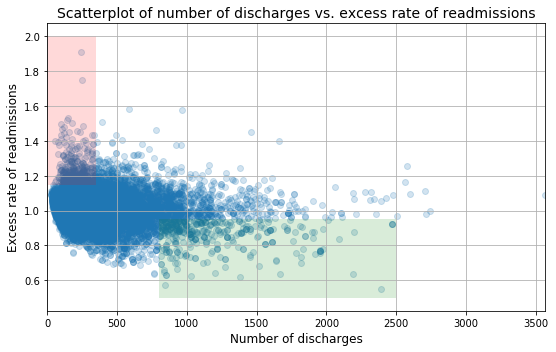

In [14]:
x = [a for a in my_df['Number of Discharges'][81:-3]]
y = list(my_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [110]:
print('Data above looks similar to the original and we did not have to throw away over 5000 entries of data')
print('Prior to hypothesis testing, observe distribution of the data, especially ERR')

Data above looks similar to the original and we did not have to throw away over 5000 entries of data
Prior to hypothesis testing, observe distribution of the data, especially ERR


C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Right skew of ERR is apparent from the distribution plot


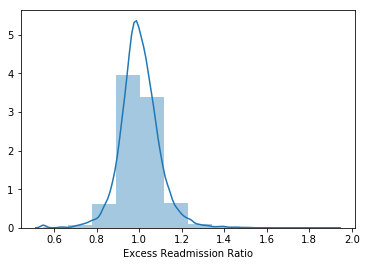

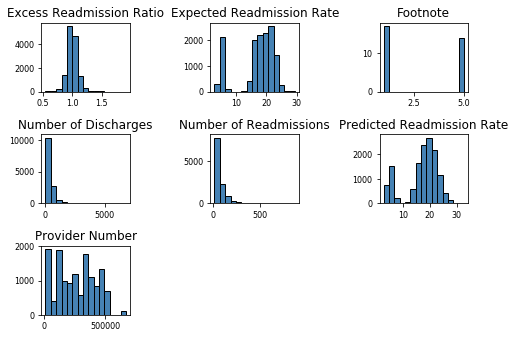

In [111]:

import seaborn as sns
import numpy as np

my_df = my_df[np.isfinite(my_df['Excess Readmission Ratio'])]

my_df['Excess Readmission Ratio'].isnull().sum()

sns.distplot(my_df['Excess Readmission Ratio'], bins=12)

my_df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

print('Right skew of ERR is apparent from the distribution plot')

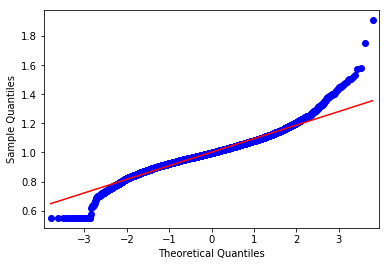

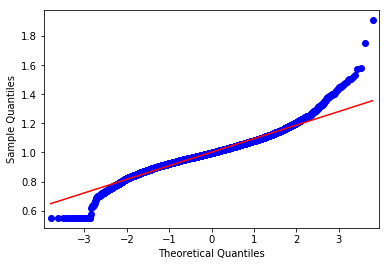

In [70]:
#Next look at QQ plot and observed a close fit with a line with minor deviations at the top and bottom.
from statsmodels.graphics.gofplots import qqplot
qqplot(my_df['Excess Readmission Ratio'], line='s')

In [77]:
# Finally, do a skewness test: skewness should be about 0 for normally distributed data
from scipy import stats
print('Skewness: ' + str(stats.skew(my_df['Excess Readmission Ratio'], axis=0)))
print('Skew value is fairly high.  Since there are no plans to apply ML to this problem, will not scale the data')

Skewness: 0.30695179370742864
Skew value is fairly high.


In [120]:
print('Step 1: State the null and alternate hypothesis.  Small hospital defined as < 100 discharges, medium hospitals are 100 to < 1000 discharges and large hospital defined as >= 1000 discharges')
print('H0: Small hospitals ERR is <= to 1 ')
print('Ha: Small hospitals ERR > 1')
print('Second hypothesis will analyze medium sized hospitals')
print('H0: Medium hospitals ERR = 1') 
print('Ha: Medium hospitals ERR != 1')
print('Lastly, perform testing on large hospitals')
print('H0: Large hospitals ERR >= 1')
print('Ha: Large hospitals ERR < 1')

Step 1: State the null and alternate hypothesis.  Small hospital defined as < 100 discharges, medium hospitals are 100 to < 1000 discharges and large hospital defined as >= 1000 discharges
H0: Small hospitals ERR is <= to 1 
Ha: Small hospitals ERR > 1
Second hypothesis will analyze medium sized hospitals
H0: Medium hospitals ERR = 1
Ha: Medium hospitals ERR != 1
Lastly, perform testing on large hospitals
H0: Large hospitals ERR >= 1
Ha: Large hospitals ERR < 1


In [157]:
# Define hospital sizes for hypothesis testing
small_df = my_df[my_df['Number of Discharges'] < 100]
medium_df = my_df[(my_df['Number of Discharges'] >= 100) & (my_df['Number of Discharges'] < 1000)]
large_df = my_df[my_df['Number of Discharges'] >= 1000]


my_df['age'] = np.where(my_df['Number of Discharges'] < 100, 'small', 
         (np.where(my_df['Number of Discharges'] >= 1000, 'large', 'medium')))

print(small_df.shape)
print(medium_df.shape)
print(large_df.shape)

(1387, 14)
(11792, 14)
(583, 14)


In [158]:
Counter(my_df['age'])

Counter({'small': 1387, 'medium': 11792, 'large': 583})

In [106]:
print('Step 2: Select the level of significance:   1% ')

Step 2: Select the level of significance:   1% 


In [ ]:
print('Step 3:  Compute the statistical test. onesamples, z-test to compare means will be appropriate')
import statsmodels.stats.weightstats
print('Step 4: Formulate the Decision Rule - since alpha is 1%, if Z score is above 2.576, the null hypothesis rejected')




In [129]:
small_results = statsmodels.stats.weightstats.ztest(x1=small_df['Excess Readmission Ratio'], value=1, alternative='larger', usevar='pooled')
print('small hospital z stat: ' + str(small_results[0]) +  '\nsmall hospital p value: ' +  str(small_results[1]))

small hospital z stat: 12.554684747365936
small hospital p value: 1.8733525330132093e-36


In [131]:
medium_results = statsmodels.stats.weightstats.ztest(x1=medium_df['Excess Readmission Ratio'], value=1, alternative='two-sided', usevar='pooled')
print('medium hospital z stat: ' + str(medium_results[0]) +  '\nmedium hospital p value: ' +  str(medium_results[1]))

medium hospital z stat: 2.5415139664780693
medium hospital p value: 0.011037353642823476


In [136]:
large_results = statsmodels.stats.weightstats.ztest(x1=large_df['Excess Readmission Ratio'], value=1, alternative='smaller', usevar='pooled')
print('large hospital z stat: ' + str(large_results[0]) +  '\nlarge hospital p value: ' +  str(large_results[1]))

large hospital z stat: -8.304081099637603
large hospital p value: 5.02974583005755e-17


In [138]:
print('Step 5: Make a decision') 
print('Small hospital we rejected the null hypothesis')
print('Medium hospital, we failed to reject the null hypothesis')
print('Large hospital, we rejected the null hypothesis')

Step 5: Make a decision
Small hospital we rejected the null hypothesis
Medium hospital, we failed to reject the null hypothesis
Large hospital, we rejected the null hypothesis


In [140]:
print('Step 6:  How does this change recommendation? ')
print('First of all, the statistical analysis is more objective and we can sound make recommendations supported by statistical evidence to upgrade treatments for small hospitals')
print('We barely failed to reject null hypothesis for medium hospitals, so we if there are budget concerns, we could recommend to not upgrade treatment for medium hospitals')
print('Since large hospitals are operating with fewer ERRs, no proposed action can be considered.')

Step 6:  How does this change recommendation? 
First of all, the statistical analysis is more objective and we can sound make recommendations supported by statistical evidence to upgrade treatments for small hospitals
We barely failed to reject null hypothesis for medium hospitals, so we if there are budget concerns, we could recommend to not upgrade treatment for medium hospitals
Since large hospitals are operating with fewer ERRs, no proposed action can be considered.


In [141]:
# Look at scatter plot and consider advantages and disadvantages
print('Scatter plots is a good way to check for patterns, outliers, relationships and see the individual distributions for the attributes.')
print('The downside of scatter plots is they are not good for presentations and not good for categorical data')

Scatter plots is a good way to check for patterns, outliers, relationships and see the individual distributions for the attributes.
The downside of scatter plots is they are not good for presentations and not good for categorical data


Text(0,0.5,'Excessive Readmission Ratio')

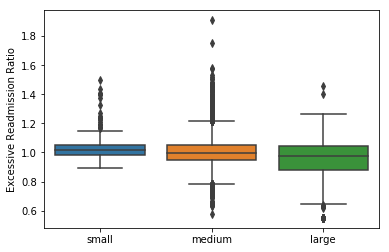

In [149]:
# Consider a boxplot, categorical violin plot, 
plot_data = [small_df['Excess Readmission Ratio'], medium_df['Excess Readmission Ratio'], large_df['Excess Readmission Ratio']]
ax = sns.boxplot(data=plot_data)
plt.xticks([0, 1, 2], ['small', 'medium', 'large'])
plt.ylabel('Excessive Readmission Ratio')

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


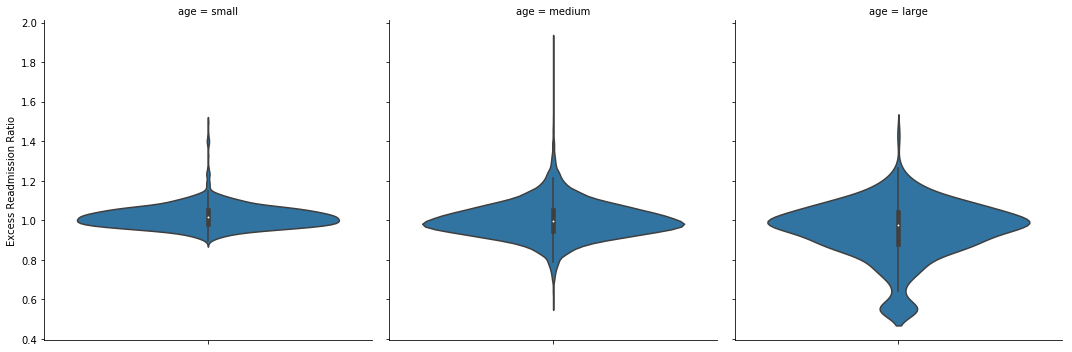

In [163]:

sns.catplot(y='Excess Readmission Ratio', col='age', data=my_df, kind='violin')